# Nomor 1 Mid - Test : Water Dataset
**Deskripsi :** <br>
Dataset berisi penggunaan air tahunan di Baltimore dari tahun 1885 hingga 1963 atau 79 tahun data. <br>
Nilainya terdapat dalam satuan liter per kapita per hari dan terdapat 79 pengamatan.<br>
Terdapat 2 variabel pada data, yaitu  :
1. Year
2. Water

**Tujuan :** <br>
Buatlah model menggunakan python untuk memprediksi penggunaan air tahunan di Baltimore.

## Load the Required Libraries

In [46]:
# For data loading and manipulation
from scipy import stats
import numpy as np
import pandas as pd

# For Visualization/EDA
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For data science and machine learning techniques
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset and split into two, dataset.csv and validation.csv

In [47]:
#Load dataset
df=pd.read_csv('water.csv', sep=';')

In [48]:
df.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [49]:
df.tail()

,Year,Water
74,1959,594
75,1960,587
76,1961,587
77,1962,625
78,1963,613


In [50]:
#Dimension of the data
df.shape

(79, 2)

In [131]:
#Split data into two, 'dataset.csv' and 'validation.csv'
split_point = int(len(df)*0.9)
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 71, Validation 8


In [132]:
dataset = pd.read_csv('dataset.csv')

In [133]:
valid = pd.read_csv('validation.csv')

Jawab :<br>
**Query yang dapat digunakan untuk load dan membagi data menjadi 2 bagian adalah seperti diatas**<br>
- Load dataset menggunakan pandas dataframe 'pd.read_csv'<br>
- Split into two sets of data dengan proporsi :

    1. 90% 'dataset.csv' yang berjumlah 71<br>
    2. 10% 'validation.csv' yang berjumlah 8

## 2. Create summary of the dataset

In [54]:
#Head of data (default =5): 5 baris pertama dari data
dataset.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [55]:
#Tail of data (default =5): 5 baris terakhir dari data
dataset.tail()

,Year,Water
66,1951,564
67,1952,549
68,1953,538
69,1954,568
70,1955,575


In [56]:
dataset.shape

(71, 2)

In [57]:
#Info tipe data, dimensi, memory, dll
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
Year     71 non-null int64
Water    71 non-null int64
dtypes: int64(2)
memory usage: 1.2 KB


In [58]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [59]:
dataset.dtypes

Year     int64
Water    int64
dtype: object

In [60]:
#Fitur dalam data
print(dataset.columns)

Index(['Year', 'Water'], dtype='object')


In [61]:
dataset.isnull().sum()

Year     0
Water    0
dtype: int64

In [134]:
#Summarize seperti mean, min, max, jumlah, std dari kedua vairabel
dataset.describe().round(2)

,Year,Water
count,71.00,71.00
mean,1920.00,502.48
std,20.64,73.80
min,1885.00,344.00
25%,1902.50,458.00
50%,1920.00,500.00
75%,1937.50,556.50
max,1955.00,662.00


Jawab :<br>
**Summary dari dataset dapat dilihat menggunakan query-query diatas, summary ini berguna untuk memahami data (Data Understanding) yang akan dianalisis agar menghasilkan analisis yang tepat dan sesuai.**<br>
**'Describe' adalah method yang paling umum untuk mengetahui langsung summary tentang data**<Br>
**Dapat disimpulkan bahwa data yang digunakan untuk membentuk model 'dataset'** :<Br>
- Setiap variabel ('Year' dan 'Water') bersifat integer <Br>
- Data memiliki dimensi (71, 2) yang artinya 71 rows dan 2 columns <br>
- Data berawal dari tahun 1885 hingga 1955<br>
- Data tidak memiliki missing value<br>
- Rata-rata 500 yang menunjukkan level data dalam analisis
- Standar deviasi sebesar 73 yang menunjukkan nilai persebaran data dan kedekatan titik data ke nilai rata-rata yang cukup sesuai.
- dsb.

## 3. Create a line plot of time series dataset will be iterated 

In [63]:
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')

In [64]:
dataset = dataset.set_index(dataset['Year'])
dataset.head()

,Year,Water
Year,,
1885-01-01,1885-01-01,356
1886-01-01,1886-01-01,386
1887-01-01,1887-01-01,397
1888-01-01,1888-01-01,397
1889-01-01,1889-01-01,413


In [65]:
dataset.drop(columns=['Year'], inplace=True)

In [66]:
dataset = dataset.astype('float64')

Text(0.5,1,'Annual Use of Water in Baltimore')

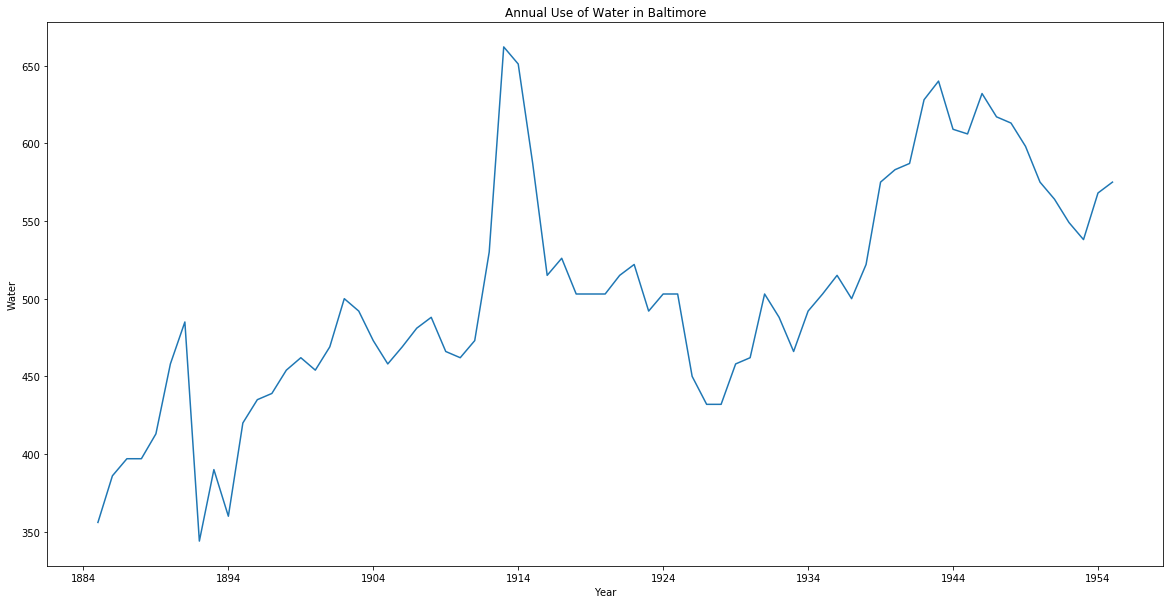

In [67]:
#Membuat Line Plot untuk time series data
rcParams['figure.figsize'] = (20, 10)

# Plot Graph
plt.xlabel('Year')
plt.ylabel('Water')
plt.plot(dataset['Water'])
plt.title('Annual Use of Water in Baltimore')

Jawab:<br>
**Membuat line plot time series dapat menggunakan fungsi plot dalam matplotlib library.**<br>
**Dari plot dapat dilihat bahwa selama +-80 tahun terjadi penggunaan air yang bersifat fluktuatif yang cenderung naik dari 10 tahun awal hingga tahun-tahun berikutnya dimana :**<br>
- Penggunaan air terbanyak adalah ketika tahun 1913 sebesar 662.<br>
- Penggunaan air tersedikit adalah ketika tahun 1892 sebesar 344.
- Tidak terlihat outlier yang jelas pada data walupun terjadi gap fluktuasi yang cukup curam di tahun 1892.

## 4. Group the annual data by decade and get an idea of the spread observation for each decade and how this may be changing

In [68]:
dataset = pd.read_csv('dataset.csv')

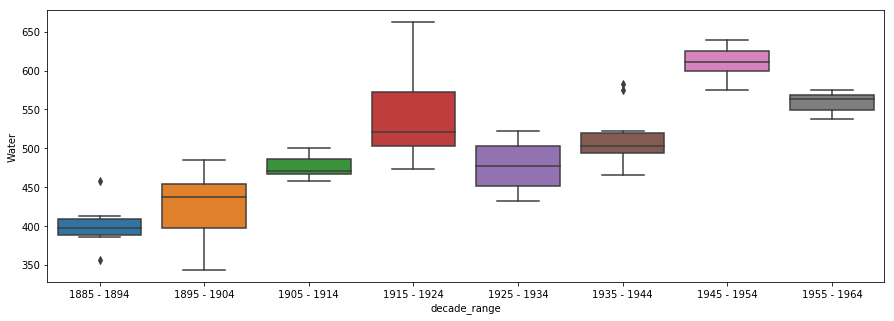

In [69]:
np.random.seed(99)
# df = pd.DataFrame({'year': sum([[x]*5 for x in range(1871,2015)], []),'AVG': abs(np.random.randn(720))/10})

# NEAREST 10 FOR DECADE START
dataset['decade'] = (dataset['Year'] // 10) * 10 + 5

# ADJUST FOR YEARS ENDING IN ZERO
dataset.loc[(dataset['Year'] % 10) == 0, 'decade'] = dataset['decade'] - 10

# CALCULATE DECADE RANGE
dataset['decade_range'] = dataset['decade'].astype('str') + ' - ' + \
                     (dataset['decade'] + 9).astype('str') 

plt.figure(figsize=(15,5))
sns.boxplot(x="decade_range", y="Water", data=dataset)   

plt.show()
plt.clf()
plt.close()

Jawab : <br>
**Pembagian decades dalam hal ini menggunakan boxplot**
**Dapat dilihat dengan pembagian per decades dalam 'dataset.csv' menjelaskan bahwa :**<br>
- Penggunaan air terbanyak terdapat pada decade tahun 1915-1924
- Penggunaan air tersedikit terdapat pada decade tahun 1895-1904

**Nilai median pada setiap decade menunjukkan trend yamg cenderung non linear yang artinya terjadi fluktuasi penggunaan air pada setiap rentang waktu 10 tahun.**<br>
**Terdapat penggunaan air yang cenderung stabil pada decades 1925-1934 yang ditunjukkan oleh boxplot warna ungu dimana Q1, Q2, dan Q3 cenderung memiliki nilai dengan kelipatan sama dengan nilai max dan min yang juga sesuai.**<br>
**Dapat dilihat bahwa terdapat beberapa outlier seperti pada decade 1885-1894 dan decade 1935-1944 yang artinya terdapat kelainan penggunaan dalam range waktu tersebut yang jauh dari penggunaan normal lainnya**

## 5. Create model using ARIMA
Dalam pemodelan ARIMA, data 'Year' harus dalam bentuk indeks. Maka, perlu untuk dijadikan indeks terlebih dahulu kemudia split data train dan test mengikuti instruksi soal.

In [146]:
dataset = pd.read_csv('dataset.csv')
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset = dataset.set_index(dataset['Year'])
dataset.drop(columns=['Year'], inplace=True)
dataset = dataset.astype('float64')

- Split the dataset into train and test sets directly

In [71]:
train_size = int(len(dataset)*0.5)
train_size

35

- The first 50% of the dataset will be held back to train the model <br>
- The last 50% of the dataset will be iterated and test the model

In [72]:
train = dataset[0:train_size]
test = dataset[train_size:]
print(train.shape)
print(test.shape)

(35, 1)
(36, 1)


In [73]:
train.head()

,Water
Year,
1885-01-01,356.0
1886-01-01,386.0
1887-01-01,397.0
1888-01-01,397.0
1889-01-01,413.0


## Modelling
- The ARIMA model (p,d,q) requires three parameters and is traditionally configured manually<br>
- Use an ARIMA(0,1,0) on the raw data may be a good starting point

In [74]:
arima_order = (0,1,0)
arima = ARIMA(train, order=arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

IndexError: list index out of range

**Dengan pembagian split data 'df' menjadi :<br>
    1. 90% 'dataset.csv' yang berjumlah 71<br>
    2. 10% 'validation.csv' yang berjumlah 8 <br>
dan pembagian train test 'dataset.csv' menjadi 50:50,
ARIMA(0,1,0) dalam model ini tidak dapat digunakan.**<BR>
**Maka, diperlukan untuk mengganti model ARIMA (p,d,q) dengan bantuan uji stationary, plot ACF, dan plot PACF**

Untuk mencari model ARIMA terbaik, parameter 'd' perlu dicari dengan melihat ke-stasioner-an data, yaitu sebagai berikut

In [118]:
#Determine Rolling Statistics
rolmean = pd.rolling_mean(train, window=12)
rolstd = pd.rolling_std(train, window=12)
print(rolmean, rolstd)

                 Water
Year                  
1885-01-01         NaN
1886-01-01         NaN
1887-01-01         NaN
1888-01-01         NaN
1889-01-01         NaN
1890-01-01         NaN
1891-01-01         NaN
1892-01-01         NaN
1893-01-01         NaN
1894-01-01         NaN
1895-01-01         NaN
1896-01-01  403.416667
1897-01-01  410.333333
1898-01-01  416.000000
1899-01-01  421.416667
1900-01-01  426.166667
1901-01-01  430.833333
1902-01-01  434.333333
1903-01-01  434.916667
1904-01-01  445.666667
1905-01-01  451.333333
1906-01-01  460.416667
1907-01-01  465.500000
1908-01-01  469.916667
1909-01-01  472.166667
1910-01-01  472.833333
1911-01-01  473.750000
1912-01-01  480.083333
1913-01-01  496.166667
1914-01-01  508.750000
1915-01-01  516.666667
1916-01-01  520.166667
1917-01-01  525.833333
1918-01-01  528.666667
1919-01-01  530.500000                 Water
Year                 
1885-01-01        NaN
1886-01-01        NaN
1887-01-01        NaN
1888-01-01        NaN
1889-01-01       

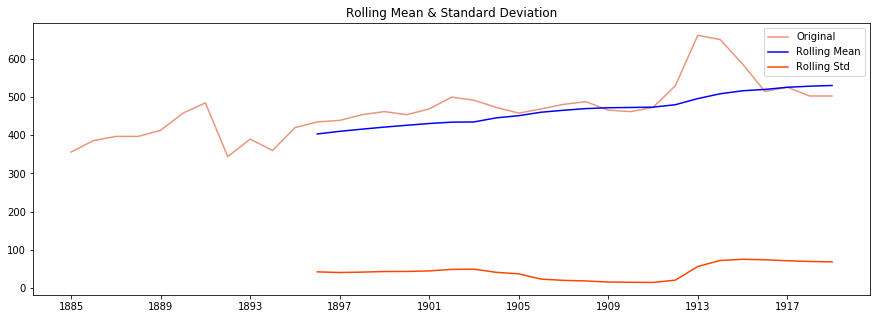

In [119]:
#Plot Rolling Statistics:
plt.figure(figsize=(15,5))
orig = plt.plot(train, color='darksalmon',label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean')
std = plt.plot(rolstd, color='orangered', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dari plot diatas dapat dilihat jika data stasioner dengan rata-rata namun tidak dengan ragam karena tidak setara dengan data. Oleh, karena itu perlu dilakukan uji hipotesis stasioner secara ragam dengan Dickey-Fuller test

In [120]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(train['Water'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.156197
p-value                         0.222526
#Lags Used                      1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


**Dengan uji hipotesis, dapat dilihat dari hasil diatas bahwa:**<br>
**H0 : Not Stationary** <br>
**H1 : Stationary** <br>
**Maka dapat disimpulkan :** <br>
**p-value : 0.2 > alpha : 0.05**<br>
  =>Tak tolak H0<br>
**Maka, 'dataset' bersifat tidak stasioner dan parameter d!=0 -> Model menjadi = ARIMA(p,d,q)**

Untuk mencari model ARIMA terbaik, parameter 'p' dan 'q' perlu dicari dengan melihat plot ACF dan plot PACF, yaitu sebagai berikut

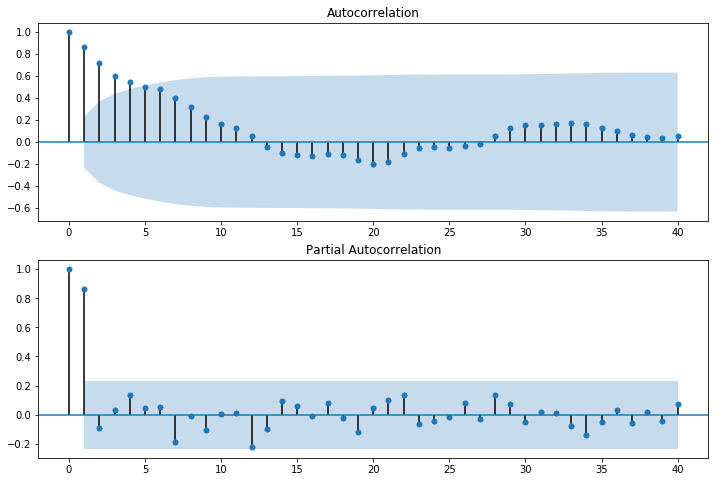

In [121]:
#ACF and PACF plots:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['Water'][1:], lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset['Water'][1:], lags=40, ax=ax2)

**Dapat dilihat dalam plot ACF bahwa tidak ada seasonal effect, namun terdapat lag = 5 maka dapat diasumsikan ACF = AR = order 'p' != '0' => p = 5.**<br>
**Sementara, pada plot PACF dapat dilihat bahwa terdapat lag = 1, maka PACF = MA = order 'q' = 1.**<br>
**Maka, model ARIMA (p,d,q) dapat menjadi : ARIMA(5,1,1) dan lain-lain dengan order 'd' != 0**

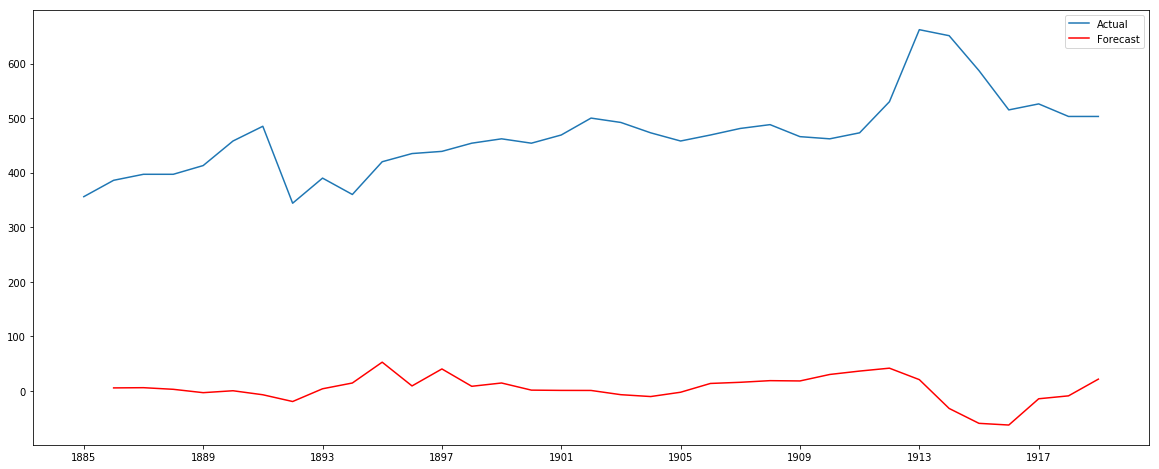

In [135]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(train, order=(5,1,1)) 
ax = plt.gca()
results = model.fit()
#Plot Fitting Model : Prediksi vs Aktual
plt.plot(train['Water'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Actual', 'Forecast'])

In [136]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 368.0452  
Dependent Variable: D.Water          Log-Likelihood:      -169.92   
Date:               2019-10-10 20:03 Scale:               1.0000    
No. Observations:   34               Method:              css-mle   
Df Model:           7                Sample:              01-01-1886
Df Residuals:       27                                    01-01-1919
Converged:          1.0000           S.D. of innovations: 33.521    
AIC:                355.8343         HQIC:                359.999   
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            5.5511    0.6457    8.5967  0.0000   4.2855   6.8167
ar.L1.D.Water    0.5941    0.1711    3.4715  0.0018   0.2587   0.9296
ar.L2.D.Water   -0.1743    0.1915   -0.9099  0.3709  -0.5496   0.2011
ar.L3.D.Water   -0.2943    0.1833   -1.6054  0.1200  -0.6536   0.0650
ar.L4.D.Water    0.0832    0.1967    0.4231  0.6756  -0.3023   0.4688
ar.L5.D.Water   -0.2047    0.1705   -1.2003  0.2404  -0.5390   0.1295
ma.L1.D.Water   -0.9999    0.0886  -11.2845  0.0000  -1.1736  -0.8263
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            0.8990            -0.7483           1.1697            -0.1105
AR.2            0.8990             0.7483           1.1697             0.1105
AR.3           -1.3899            -0.0000           1.3899            -0.5000
AR.4           -0.0008            -1.6029           1.6029            -0.2501
AR.5           -0.0008             1.6029           1.6029             0.2501
MA.1            1.0001             0.0000           1.0001             0.0000
====================================================================

"""

- When model trained, a one-step prediction made ang the prediction stored for later evaluation.<br>
- The actual observation from the test dataset will be added to the training dataset for the next iteration.<br>

## Prediction Analysis
- The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.

In [137]:
#Nilai prediksi dari model
y_pred = arima_fit.forecast(len(test))[0]
df_test = pd.DataFrame(y_pred, columns=['prediksi'], index=test.index)
df_test['aktual'] = test.values
df_test.round(2)

,prediksi,aktual
Year,,
1920-01-01,574.86,503.0
1921-01-01,568.26,515.0
1922-01-01,566.05,522.0
1923-01-01,564.23,492.0
1924-01-01,564.71,503.0
1925-01-01,564.67,503.0
1926-01-01,564.42,450.0
1927-01-01,563.34,432.0
1928-01-01,562.18,432.0


In [138]:
mse = mean_squared_error(df_test['aktual'], df_test['prediksi'])
rmse = np.sqrt(mse)
rmse

74.8015302760877

**Dapat dilihat dari plot bahwa hasil prediksi dan aktual sangat jauh berbeda dan bahkan tidak dapat disamakan.**<br> 
**Dapat dilihat juga bahwa nilai RMSE = 74.80 yang mengindikasikan bahwa nilai error yang dihasilkan terlalu besar dan mengindikasikan model ini bukanlah model terbaik.**<br>
**Hal ini dapat disebabkan antara lain karena:**<br>
1. Train Test Split data yang tidak sebanding yaitu 50:50
2. Jumlah data yang kurang banyak sehingga tidak dapat memberikan hasil analisis yang terbaik
3. Kurangnya analisis lebih lanjut terkait kombinasi model ARIMA dengan parameter terbaik

## 6. Calculate the RMSE using the helper function from the scikit-learn library, from dataset only
- Those RMSE will show you on average, how much the error/the model was wrong/gap between predection and expected value per capita per day for each prediction made.

Memvalidasi model menggunakan data 'validation.csv'. Model yang digunakan untuk vvalidasi ini adalah model dengan 'dataset.csv'

In [142]:
valid = pd.read_csv('validation.csv')
valid['Year'] = pd.to_datetime(valid['Year'], format='%Y')
valid = valid.set_index(valid['Year'])
valid.drop(columns=['Year'], inplace=True)
valid = valid.astype('float64')
valid.head()

,Water
Year,
1956-01-01,579.0
1957-01-01,587.0
1958-01-01,602.0
1959-01-01,594.0
1960-01-01,587.0


In [147]:
dataset = pd.read_csv('dataset.csv')
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset = dataset.set_index(dataset['Year'])
dataset.drop(columns=['Year'], inplace=True)
dataset = dataset.astype('float64')

In [148]:
dataset.head()

,Water
Year,
1885-01-01,356.0
1886-01-01,386.0
1887-01-01,397.0
1888-01-01,397.0
1889-01-01,413.0


In [158]:
# fit ARIMA model
model = ARIMA(dataset, order=(5,1,1)) 
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 718.2617  
Dependent Variable: D.Water          Log-Likelihood:      -342.14   
Date:               2019-10-10 20:08 Scale:               1.0000    
No. Observations:   70               Method:              css-mle   
Df Model:           7                Sample:              01-01-1886
Df Residuals:       63                                    01-01-1955
Converged:          1.0000           S.D. of innovations: 31.526    
AIC:                700.2737         HQIC:                707.419   
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            2.7369    0.6952    3.9370  0.0002   1.3744   4.0995
ar.L1.D.Water    0.9123    0.1200    7.6010  0.0000   0.6770   1.1475
ar.L2.D.Water   -0.1284    0.1591   -0.8072  0.4226  -0.4403   0.1834
ar.L3.D.Water   -0.1329    0.1590   -0.8360  0.4063  -0.4446   0.1788
ar.L4.D.Water    0.1638    0.1584    1.0338  0.3052  -0.1467   0.4743
ar.L5.D.Water   -0.0493    0.1184   -0.4159  0.6789  -0.2814   0.1829
ma.L1.D.Water   -0.9999    0.0407  -24.5878  0.0000  -1.0796  -0.9202
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.7380            -0.0000           1.7380            -0.5000
AR.2            0.6052            -1.7547           1.8562            -0.1971
AR.3            0.6052             1.7547           1.8562             0.1971
AR.4            1.3602            -0.0000           1.3602            -0.0000
AR.5            2.4928            -0.0000           2.4928            -0.0000
MA.1            1.0001             0.0000           1.0001             0.0000
====================================================================

"""

In [154]:
#Nilai prediksi dari validation
y_pred = arima_fit.forecast(len(valid))[0]
df_valid = pd.DataFrame(y_pred, columns=['prediksi'], index=valid.index)
df_valid['aktual'] = valid.values
df_valid.round(2)

,prediksi,aktual
Year,,
1956-01-01,584.42,579.0
1957-01-01,587.70,587.0
1958-01-01,594.65,602.0
1959-01-01,599.63,594.0
1960-01-01,604.68,587.0
1961-01-01,608.44,587.0
1962-01-01,612.18,625.0
1963-01-01,615.56,613.0


In [155]:
mse = mean_squared_error(df_valid['aktual'], df_valid['prediksi'])
rmse = np.sqrt(mse)
rmse

11.504436049280256

## Kesimpulan : 

Dari analsis di atas, bisa dilihat metode time series sangat berguna dalam memprediksi perkembangan trend dari suatu data yang dalam hal ini adalah penggunaan air tahunan di Baltimore. Dari analisis di atas, terdapat data tahun dan penggunaan air setiap tahunnya dari tahun 1885 hingga 1963. Dengan perhitungan, time series ini dapat digunakan untuk memprediksi penggunaan air tahunan di tahun selanjutnya dimana dari data 'water.csv' data dibagi menjadi dua, yaitu:<br>
1. dataset.csv (90%, 1885-1955) => yang digunakan untuk pembentukan model, dengan model dibagi lagi menjadi train dan test data. <br>
2. validation.csv (10%, 1956-1963) => yang digunakan untuk memvalidasi model yang terbentuk

Dapat dilihat bahwa model ARIMA terbaik dalam analisis ini adalah **ARIMA = (5,1,1)** <br>
dengan :<bR>
Hasil RMSE pada model development dengan data 'dataset.csv' adalah **74.80**<br>
Hasil RMSE pada data validation model denga data 'validation.csv' adalah **11.50**<br>
    
Dari hasil RMSE tersebut dapat dilihat bahwa model bukan merupakan model terbaik. Saat dilakukan training testing dengan model 'dataset.csv', hasil RMSE menunjukkan error model yang masih besar namun saat digunakan untuk memprediksi data validasi 'validation.csv' model memberikan hasil prediksi dengan nilai RMSE yang jauh lebih baik walaupun belum memenuhi kondisi ideal juga. Dalam hal ini, dapat disimpulkan bahwa model ini bukan merupakan model terbaik untuk beberapa data dengan kondisi tertentu.<br>
Walau begitu model ARIMA ini tetap dapat digunakan untuk memprediksi data namun tidak dengan akurasi yang tinggi ataupun error yang rendah. Hal ini dapat ditingkatkan lagi dengan analisis lebih lanjut terkait parameter model ARIMA(p, d, q) yang mungkin dapat dilakukan tuning parameter dengan percobaan-percobaan yang lebih ekstra lagi.<br>

Hasil dari prediksi penggunaan air tahunan di Baltimore menggunakan model ARIMA ini dapat digunakan antara lain, untuk:
1. Mengetahui persediaan air yang harus disiapkan untuk tahun berikutnya
2. Pencegahan terjadinya kekurangan air di daerah-daerah
3. Pengecekan kemungkinan terjadinya fraud atau hal-hal yang berkelainan dari penggunaan air normal di setiap tahunnya
4. Meminimalisasi kerugian ataupun kecurangan dari berbagai pihak
5. dsb